In [ ]:
import ibmJupyterNotebookStyles
ibmJupyterNotebookStyles.apply_ibm_styles() 

# Get started with IBM Quantum hardware 

In this tutorial we demonstrate how to use IBM Quantum hardware for machine learning applications. First we have to create and draw our quantum circuit. Additionally, we have to choose a quantum computer and start the machine. Next, we send the circuit drawing to the quantum computer. To do so we need to make some adjustments in the drawing for the quantum computer to understand our drawing, i.e. transpile. Lastly, we execute the model and obtain a prediction. 

## Draw quantum circuit

We start by creating our quantum circuit. Our quantum circuit consist of two qubits, wires, and operations. 

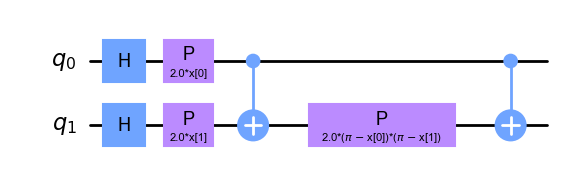

In [2]:
from qiskit import *
from qiskit.circuit.library import ZZFeatureMap

# Define quantum circuit
feature_map = ZZFeatureMap(feature_dimension=2,reps=1, entanglement="linear")
feature_map.decompose().draw("mpl")

## Start quantum computer hardware

Next, we need to pick and start the quantum machine. Hence, IBM has several quantum computers which you can choose. Therefore, it could be useful to look at the queue time of each device and take the one with the least queue time. Several other things you may want to consider such as number of qubits, system status, and quantum volume (QV). 

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Set up runtime service
# Set backend 
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.backend("ibmq_lima")


<img src="img/Lima_start_hardware.png" alt="drawing" width="600"/>


In [4]:
# backends = service.backends()
# for b in backends:
#     if b.name[:3] == 'ibm':
#         status = b.status()
#         stat = 'online' if status.operational else 'offline'
#         print(f'{b.name}, {b.num_qubits} qubits, {stat}, queue length: {status.pending_jobs}')
#     else:
#         print(b.name)

## Draw quantum hardware and investigate structure

Next, it is important to investigate the arrangement of the qubits on the quantum chip. The quantum computer we have started has five qubits, which are arranged in a T shape (see image). 

<img src="img/Lima_hardware.png" alt="drawing" width="600"/>


## Instruct machine on quantum circuit drawing

In this step we pass the quantum circuit drawing to the quantum computer. As such, we have to adjust our circuit drawing to the qubit configuration. Hence, our quantum circuit drawing contains two qubits whereas our chip has 5. Therefore, we need to change the settings of the machine to read the circuit drawing correctly. This process is called transpilation of the quantum circuit drawing. There are more settings we can change during transpilation, which improve the outcome of the prediction. The optimization_level is an example of such a setting.

In [5]:
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel 
from qiskit_ibm_runtime import Sampler



# Runtime 
sampler = Sampler(session=backend)
fidelity = ComputeUncompute(sampler=sampler)


#calculate quantum kernel
# Will be executed on quantum hardware
feature_map_trans1 = transpile(feature_map, backend, optimization_level=1, seed_transpiler=20)
qk = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map_trans1)


## Execute and predict

In the final step, we will execute the quantum circuit drawing and make a prediction. To execute the quantum circuit drawing we have to load the data and than execute the training of our quantum machine learning model. Once, the model has learnt the data patterns we can make a prediction. 

### Load data

In [6]:
# Train data
X_train = [[3.14159265, 1.14239733], [1.38599676, 0.99959766], [0.83159806, 1.99919533], [0.64679849, 2.14199499],[0.73919827, 2.57039399],[0.64679849, 0.        ],
           [1.84799568, 0.99959766],[0.46199892, 1.99919533],[0.64679849, 1.42799666], [0.73919827, 1.85639566]]
y_train = [0, 0, 1, 1, 1, 0, 0, 1, 1, 1]

# Test data
X_test = [[1.66319611, 1.14239733]]
y_test = [0]

### Execute model

In [7]:
from sklearn.svm import SVC

# Evaluates kernel on quantum hardware
kernel_matrix = qk.evaluate

# Fit the model
qsvm = SVC(kernel=kernel_matrix)

In [8]:
qsvm.fit(X_train, y_train)

SVC(kernel=<bound method FidelityQuantumKernel.evaluate of <qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x136317df0>>)

<img src="img/Computation_time.png" alt="drawing" width="600"/>


### Predict

In [9]:
y_pred = qsvm.predict(X_test)

In [15]:
print("True value: ",y_test[0])
print("Prediction: ",y_pred[0])

True value:  0
Prediction:  0


<span style="font-size:10pt; font-weight:bold;" class = "copyright-content"> &copy; Copyright IBM Corp. 2023 <br/>This content is categorized as an “existing” IBM asset as part of the IBM Quantum Accelerator contract. </span>